In [1]:
import xarray as xr
from azure.storage.blob import BlobServiceClient
import zarr
import pandas as pd
from dotenv import load_dotenv
import os
import numpy as np
import seaborn as sns
# import cartopy.crs as ccrs
import matplotlib.pyplot as plt
# get credential from .env
load_dotenv()
storage_account_name = os.getenv('AZURE_STORAGE_ACCOUNT_NAME')
sas_token = os.getenv('AZURE_STORAGE_SAS_TOKEN')
container_name = os.getenv('CONTAINER_NAME')
azure_url=os.getenv('AZURE_URL')


In [2]:
# Boiler plate code for reading data from a remote storage blob
def read_zarr_from_blob(account_name, container_name, blob_name):
    sas_token = os.getenv('AZURE_STORAGE_SAS_TOKEN')
    blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=sas_token)
    container_client = blob_service_client.get_container_client(container_name)
    zarr_store = zarr.ABSStore(prefix=blob_name, client=container_client)
    ds = xr.open_zarr(zarr_store)
    return ds

In [3]:
def get_cloud_at_year(year):
    fileName = "total_cloud_cover_"+str(year)+".zarr"
    blob_file_name1 = "data/ERA5/"+fileName
    current_ds = read_zarr_from_blob(
        storage_account_name, container_name, blob_file_name1
    )
    return current_ds

cloud_2022_ds = get_cloud_at_year(2022)
print(cloud_2022_ds)

<xarray.Dataset> Size: 222MB
Dimensions:     (latitude: 133, longitude: 281, time: 1488)
Coordinates:
  * latitude    (latitude) float64 1kB 53.0 52.75 52.5 52.25 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 2kB 230.0 230.2 230.5 ... 299.5 299.8 300.0
    number      int64 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * time        (time) datetime64[ns] 12kB 2022-07-01 ... 2022-08-31T23:00:00
    valid_time  (time) datetime64[ns] 12kB ...
Data variables:
    tcc         (time, latitude, longitude) float32 222MB ...
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2024-03-26T18:19 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts


In [8]:
def get_sea_level_pressure_at_year(year):
    fileName = "mean_sea_level_pressure_"+str(year)+".zarr"
    blob_file_name1 = "data/ERA5/"+fileName
    current_ds = read_zarr_from_blob(
        storage_account_name, container_name, blob_file_name1
    )
    return current_ds

sea_2021_ds = get_sea_level_pressure_at_year(2021)
print(sea_2021_ds)

<xarray.Dataset> Size: 222MB
Dimensions:     (latitude: 133, longitude: 281, time: 1488)
Coordinates:
  * latitude    (latitude) float64 1kB 53.0 52.75 52.5 52.25 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 2kB 230.0 230.2 230.5 ... 299.5 299.8 300.0
    number      int64 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * time        (time) datetime64[ns] 12kB 2021-07-01 ... 2021-08-31T23:00:00
    valid_time  (time) datetime64[ns] 12kB ...
Data variables:
    msl         (time, latitude, longitude) float32 222MB ...
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2024-03-26T18:10 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts


In [10]:
def get_weather_at_year(weatherType, year):
    if weatherType.lower() == "cloud":
        fileType = "total_cloud_cover_"+str(year)
    elif weatherType.lower() == "temperature":
        fileType = "2m_temperature_"+str(year)
    elif weatherType.lower() == "dewpoint":
        fileType = "2m_dewpoint_temperature_"+str(year)
    elif weatherType.lower() == "sea_pressure":
        fileType = "mean_sea_level_pressure_"+str(year)
    elif weatherType.lower() == "wind_u":
        fileType = "10m_u_component_of_wind_"+str(year)
    elif weatherType.lower() == "wind_v":   
        fileType = "10m_v_component_of_wind_"+str(year)
        
    fileName =  fileType+".zarr"
    blob_file_name1 = "data/ERA5/"+fileName
    current_ds = read_zarr_from_blob(
        storage_account_name, container_name, blob_file_name1
    )
    return current_ds

cloud_2021_ds = get_weather_at_year("cloud",2021)
cloud_2022_ds = get_weather_at_year("cloud",2022)
wind_2022_v_ds = get_weather_at_year("wind_v",2022)
wind_2022_u_ds = get_weather_at_year("wind_u",2022)
temperature_2022 = get_weather_at_year("cloud",2022)
dewpoint_2022 = get_weather_at_year("dewpoint",2022)
sea_pressure_2021 = get_weather_at_year("sea_pressure",2021)

print("cloud_2021_ds", cloud_2021_ds)
print("cloud_2022_ds", cloud_2022_ds)
print("wind_2022_v_ds", wind_2022_v_ds)
print("wind_2022_u_ds", wind_2022_u_ds)
print("temperature_2022", temperature_2022)
print("dewpoint_2022", dewpoint_2022)
print("sea_pressure_2021", sea_pressure_2021)

cloud_2021_ds <xarray.Dataset> Size: 222MB
Dimensions:     (latitude: 133, longitude: 281, time: 1488)
Coordinates:
  * latitude    (latitude) float64 1kB 53.0 52.75 52.5 52.25 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 2kB 230.0 230.2 230.5 ... 299.5 299.8 300.0
    number      int64 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * time        (time) datetime64[ns] 12kB 2021-07-01 ... 2021-08-31T23:00:00
    valid_time  (time) datetime64[ns] 12kB ...
Data variables:
    tcc         (time, latitude, longitude) float32 222MB ...
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2024-03-26T17:30 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts
cloud_2022_ds <xarray.Dataset> Size:

In [25]:
# get a list of datetime to read as part of blob_name
def generateTimeStamp(start_month, end_month):
    datetime_list = []
    for i in range(start_month, end_month + 1):
        month = "0" + str(i)
        for j in range(1, 31):
            if 1 <= j < 10:
                day = "0" + str(j)
            else:
                day = str(j)
            if month == "06" and day == "31":
                continue

            datetime = "2022" + month + day
            datetime_list.append(datetime)
    return datetime_list


# get single date of SHSR radar dataset
def get_single_date_SHSR(datetime):
    date_str = np.datetime_as_string(datetime, unit="D").replace("-", "")
    blob_file_name = "data/SHSR/" + date_str + ".zarr"
    current_ds = read_zarr_from_blob(
        storage_account_name, container_name, blob_file_name
    )
    return current_ds


# get all the SHSR radar dateset from date range(2022.05.01 - 2022.08.31)
def get_total_SHSR_ds(start_month, end_month):

    datetime_list = generateTimeStamp(start_month, end_month)
    concatenated_list = []
    for datetime in datetime_list:
        blob_file_name = "data/SHSR/" + datetime + ".zarr"
        current_ds = read_zarr_from_blob(
            storage_account_name, container_name, blob_file_name
        )
        concatenated_list.append(current_ds)

    concatenated_ds = xr.concat(concatenated_list, dim="time")
    return concatenated_ds

In [26]:
# lightning dataset for the max lightning date

# get NLDN lightning data for CONUS
def get_NLDN_lightning_Data(start_date, end_date):
    blob_file_name = "data/lightning.zarr"
    nldn_ds = read_zarr_from_blob(storage_account_name, container_name,blob_file_name)
    ds = nldn_ds.sel(
            latitude=slice(50, 25),
            longitude=slice(235, 295),
            time=slice(start_date, end_date)) 
    return ds

# get the sum of lightning count for each day across the CONUS for the specific date range
def get_lightning_sum_per_day():
    total_nldn_ds = get_NLDN_lightning_Data("2022-07-01","2022-07-31") # change the time range
    sum_lightning = total_nldn_ds.lightning.sum(dim=['latitude','longitude']).compute()
    return sum_lightning

# get the max lightning date in which the lightning count is the highest
def get_the_date_with_highest_lightning_ct():
    ds =  get_lightning_sum_per_day()
    max_lightning_date_index = ds.argmax(dim='time')
    max_lightning_date = ds.time[max_lightning_date_index]
    # print the max lightning date
    print("max_lightning_date: ", max_lightning_date.values)
    return max_lightning_date.values

# get the lightning data for the max lightning date
def get_lightning_data_for_max_lightning_date():
    datetime = get_the_date_with_highest_lightning_ct()
    date_str_full = str(datetime)
    date_str = date_str_full[0:10]
    ds = get_NLDN_lightning_Data(date_str,date_str)
    return ds

def get_24hr_lightning_data_for_max_lightning_date():
    datetime = get_the_date_with_highest_lightning_ct()
    date_str_full = str(datetime)
    date_str = date_str_full[0:10]
    ds = get_NLDN_lightning_Data(date_str,date_str+"T23:59:59")
    return ds

# get the active location info for the max lightning date
def get_active_location_info_for_max_lightning_date():
    ds = get_lightning_data_for_max_lightning_date()
    lightning_data = ds["lightning"].compute()
    selected_indices = np.where(lightning_data > 0)
    selected_lat_lon = ds[["latitude", "longitude"]].isel(
        latitude=selected_indices[0], longitude=selected_indices[1]
    )
    ds_unique = selected_lat_lon.drop_duplicates(dim=["latitude", "longitude"])
    return ds_unique

In [27]:
get_the_date_with_highest_lightning_ct()

max_lightning_date:  2022-07-21T21:00:00.000000000


numpy.datetime64('2022-07-21T21:00:00.000000000')

In [28]:
def get_top10_lightning_dates():
    ds = get_lightning_sum_per_day()  # 获取每天的闪电总数
    # 将数据按照闪电次数进行降序排序
    sorted_ds = ds.sortby(ds, ascending=False)
    # 选取前10个日期
    top10_dates = sorted_ds.time[:10]
    return top10_dates.values

get_top10_lightning_dates()

# 2022-08-03
# 2022-07-21
# 2022-08-08
# 2022-07-06
# 2022-08-29
# 2022-07-12

KeyboardInterrupt: 

In [29]:
# radar data for the max lightning date resampled to 1H
# radar data resample to 1H
# calculate the mean, std, sum, count, diff, above_30_count for SHSR>0
def simplify_time_range_for_SHSR(ds):
    ds_shsr_positive = ds.where(ds["SHSR"] > 0)
    ds_resampled_mean = (
        ds_shsr_positive.resample(time="1H").mean().rename({"SHSR": "SHSR_mean"})
    )
    ds_resampled_std = (
        ds_shsr_positive.resample(time="1H").std().rename({"SHSR": "SHSR_std"})
    )
    ds_resampled_sum = (
        ds_shsr_positive.resample(time="1H").sum().rename({"SHSR": "SHSR_sum"})
    )
    ds_resampled_ct = (
        ds_shsr_positive.resample(time="1H").count().rename({"SHSR": "SHSR_ct"})
    )
    ds_resampled_diff = (
        ds_shsr_positive.resample(time="1H").max()
        - ds_shsr_positive.resample(time="1H").min()
    ).rename({"SHSR": "SHSR_diff"})

    ds_shsr_above_30_ct = ds_shsr_positive.where(
        ds_shsr_positive["SHSR"] > 30
    )
    ds_resampled_above_30_ct = (
        ds_shsr_above_30_ct.resample(time="1H")
        .count()
        .rename({"SHSR": "SHSR_above_30_ct"})
    )

    ds_merged = xr.merge(
        [
            ds_resampled_mean,
            ds_resampled_std,
            ds_resampled_sum,
            ds_resampled_ct,
            ds_resampled_diff,
            ds_resampled_above_30_ct,
        ]
    )

    return ds_merged


def get_max_date_SHSR_in_hr_range():
    max_date = get_the_date_with_highest_lightning_ct()
    max_date_SHSR = get_single_date_SHSR(max_date)
    ds = simplify_time_range_for_SHSR(max_date_SHSR)
    return ds

def new_get_max_date_SHSR_in_hr_range():
    max_date = get_the_date_with_highest_lightning_ct()
    max_date_SHSR = get_single_date_SHSR(max_date)
    next_day_date = max_date + np.timedelta64(1,"D")
    next_date_SHSR = get_single_date_SHSR(next_day_date)
    combined_ds = xr.concat([max_date_SHSR, next_date_SHSR], dim="time")
    ds = simplify_time_range_for_SHSR(combined_ds)
    return ds

def get_next_date_SHSR_in_hr_range():
    max_date = get_the_date_with_highest_lightning_ct()
    next_day_date = max_date + np.timedelta64(1,"D")
    next_date_SHSR = get_single_date_SHSR(next_day_date)
    ds = simplify_time_range_for_SHSR(next_date_SHSR)
    return ds

In [30]:
# radar data for the max lightning date resampled to 1H and 0.25 degree grid
# calculate total SHSR_mean, SHSR_std, SHSR_sum, SHSR_ct, SHSR_diff for each 0.25 degree grid
def get_max_date_SHSR_in_hr_range_and_quarter_degree_range():
    ds = get_max_date_SHSR_in_hr_range()
    new_longitude = np.around(ds["longitude"] / 0.25) * 0.25
    new_latitude = np.around(ds["latitude"] / 0.25) * 0.25

    # interpolate the data to 0.25 degree grid
    ds_interp = ds.interp(
        latitude=new_latitude, longitude=new_longitude, method="nearest"
    )

    ds_interp["longitude"] = np.around(ds_interp["longitude"] // 0.25) * 0.25
    ds_interp["latitude"] = np.around(ds_interp["latitude"] // 0.25) * 0.25
    print("interp", ds_interp.longitude.values)
    # rename the variable
    ds_interp = ds_interp.rename(
        {
            "SHSR_mean": "total_SHSR_mean",
            "SHSR_std": "total_SHSR_std",
            "SHSR_sum": "total_SHSR_sum",
            "SHSR_ct": "total_SHSR_ct",
            "SHSR_diff": "total_SHSR_diff",
            "SHSR_above_30_ct": "total_SHSR_above_30_ct",
        }
    )

    # calculate the total, avg, max, min for each variable
    ds_interp["total_SHSR_Mean"] = ds_interp["total_SHSR_mean"].sum(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["avg_SHSR_mean"] = ds_interp["total_SHSR_mean"].mean(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["max_SHSR_mean"] = ds_interp["total_SHSR_mean"].max(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["min_SHSR_mean"] = ds_interp["total_SHSR_mean"].min(
        dim=["time", "latitude", "longitude"]
    )

    ds_interp["total_SHSR_Std"] = ds_interp["total_SHSR_std"].sum(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["avg_SHSR_std"] = ds_interp["total_SHSR_std"].mean(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["max_SHSR_std"] = ds_interp["total_SHSR_std"].max(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["min_SHSR_std"] = ds_interp["total_SHSR_std"].min(
        dim=["time", "latitude", "longitude"]
    )

    ds_interp["total_SHSR_Sum"] = ds_interp["total_SHSR_sum"].sum(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["avg_SHSR_sum"] = ds_interp["total_SHSR_sum"].mean(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["max_SHSR_sum"] = ds_interp["total_SHSR_sum"].max(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["min_SHSR_sum"] = ds_interp["total_SHSR_sum"].min(
        dim=["time", "latitude", "longitude"]
    )

    ds_interp["total_SHSR_Ct"] = ds_interp["total_SHSR_ct"].sum(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["avg_SHSR_ct"] = ds_interp["total_SHSR_ct"].mean(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["max_SHSR_ct"] = ds_interp["total_SHSR_ct"].max(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["min_SHSR_ct"] = ds_interp["total_SHSR_ct"].min(
        dim=["time", "latitude", "longitude"]
    )

    ds_interp["total_SHSR_Diff"] = ds_interp["total_SHSR_diff"].sum(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["avg_SHSR_diff"] = ds_interp["total_SHSR_diff"].mean(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["max_SHSR_diff"] = ds_interp["total_SHSR_diff"].max(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["min_SHSR_diff"] = ds_interp["total_SHSR_diff"].min(
        dim=["time", "latitude", "longitude"]
    )

    ds_interp["total_SHSR_Above_30_Ct"] = ds_interp["total_SHSR_above_30_ct"].sum(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["avg_SHSR_above_30_ct"] = ds_interp["total_SHSR_above_30_ct"].mean(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["max_SHSR_above_30_ct"] = ds_interp["total_SHSR_above_30_ct"].max(
        dim=["time", "latitude", "longitude"]
    )
    ds_interp["min_SHSR_above_30_ct"] = ds_interp["total_SHSR_above_30_ct"].min(
        dim=["time", "latitude", "longitude"]
    )

    return ds_interp

In [31]:
# radar data for the max lightning date resampled to 1H and 0.25 degree grid
ds_SHSR = get_max_date_SHSR_in_hr_range_and_quarter_degree_range()

max_lightning_date:  2022-07-21T21:00:00.000000000


/Users/shensunny/anaconda3/envs/cartopy-dev/lib/python3.12/site-packages/xarray/core/groupby.py:532: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(
/Users/shensunny/anaconda3/envs/cartopy-dev/lib/python3.12/site-packages/xarray/core/groupby.py:532: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(
/Users/shensunny/anaconda3/envs/cartopy-dev/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/shensunny/anaconda3/envs/cartopy-dev/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/shensunny/anaconda3/envs/cartopy-dev/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: R

interp [231.25 231.25 231.25 ... 299.75 299.75 299.75]


In [8]:
# lightning data for the max lightning date
ds_nldn = get_lightning_data_for_max_lightning_date()

In [9]:
# find the top 10 lightning event's location in the max lightning date

flat_lightning_values = ds_nldn.lightning.values.flatten()
sorted_indices = np.argsort(flat_lightning_values)[-10:]

max_events = []

for idx in sorted_indices[::-1]:
    position = np.unravel_index(idx, ds_nldn.lightning.shape)
    max_latitude = ds_nldn.latitude[position[1]].values
    max_longitude = ds_nldn.longitude[position[2]].values
    lightning_value = ds_nldn.lightning[position].values
    max_events.append((max_latitude, max_longitude))
    print(
         f"Graph for max lightning at latitude {max_latitude}, longitude {max_longitude} with a lightning value of {lightning_value}.")

print(max_events)

Graph for max lightning at latitude 38.25, longitude 269.0 with a lightning value of 9314.0.
Graph for max lightning at latitude 26.25, longitude 278.25 with a lightning value of 7317.0.
Graph for max lightning at latitude 39.5, longitude 270.25 with a lightning value of 7025.0.
Graph for max lightning at latitude 40.75, longitude 272.5 with a lightning value of 6393.0.
Graph for max lightning at latitude 40.0, longitude 271.25 with a lightning value of 6380.0.
Graph for max lightning at latitude 32.25, longitude 278.5 with a lightning value of 6229.0.
Graph for max lightning at latitude 31.0, longitude 278.0 with a lightning value of 6175.0.
Graph for max lightning at latitude 32.75, longitude 278.75 with a lightning value of 6125.0.
Graph for max lightning at latitude 38.5, longitude 269.0 with a lightning value of 6081.0.
Graph for max lightning at latitude 38.75, longitude 269.75 with a lightning value of 5889.0.
[(array(38.25), array(269.)), (array(26.25), array(278.25)), (array(3

In [12]:
#  plot SHSR and lightning


def plot_SHSR_and_lightning(latitude, longitude, ds_SHSR, ds_nldn):

    # Select SHSR data for the given latitude and longitude
    SHSR = ds_SHSR.drop_duplicates(dim=["latitude", "longitude"])
    SHSR_unique = SHSR.sel(latitude=latitude, longitude=longitude, method="nearest")
    time_values = SHSR_unique.time.values
    data_values_1 = SHSR_unique.total_SHSR_mean.values.squeeze()
    data_values_2 = SHSR_unique.total_SHSR_std.values.squeeze()
    data_values_3 = SHSR_unique.total_SHSR_above_30_ct.values.squeeze()

    # Select NLDN data for the same location
    ds_nldn_location = ds_nldn.sel(
        latitude=latitude, longitude=longitude, method="nearest"
    )

    # Plotting
    fig, ax = plt.subplots()

    ax.scatter(time_values, data_values_1, color="blue", label="Total SHSR Mean")
    ax.scatter(time_values, data_values_2, color="red", label="Total SHSR Std")
    ax.scatter(
        time_values, data_values_3, color="orange", label="Total SHSR Above 30 Ct"
    )

    ax.set_xlabel("Time")
    ax.set_ylabel("Values")
    ax.set_title(f"SHSR Mean and Std over Time at Lat {latitude}, Lon {longitude}")

    ax2 = ax.twinx()
    ax2.step(
        ds_nldn_location.time.values,
        ds_nldn_location.lightning.values,
        color="green",
        label="Lightning",
    )

    ax.legend(loc="upper left")
    ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.8))

    fig.autofmt_xdate()

    plt.show()

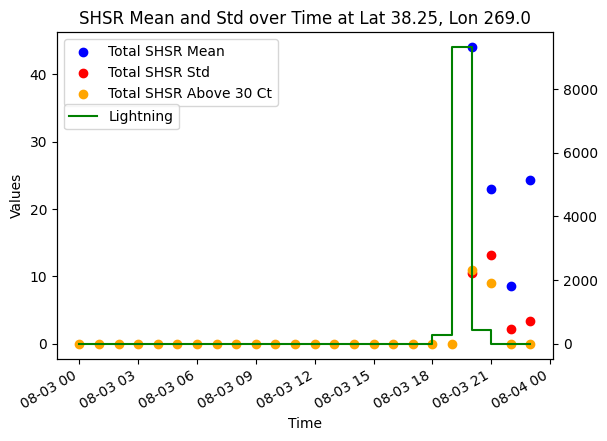

In [13]:
plot_SHSR_and_lightning(38.25, 269.0, ds_SHSR, ds_nldn)

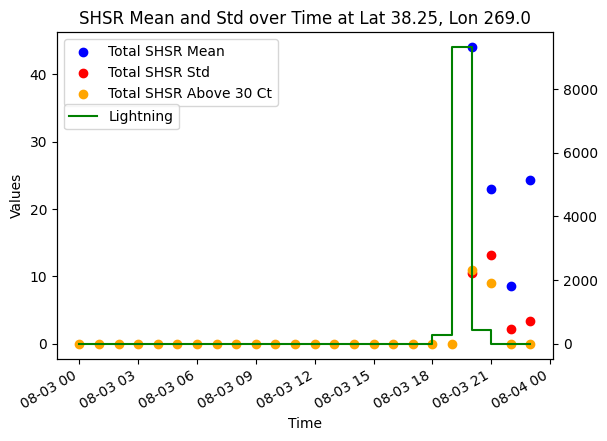

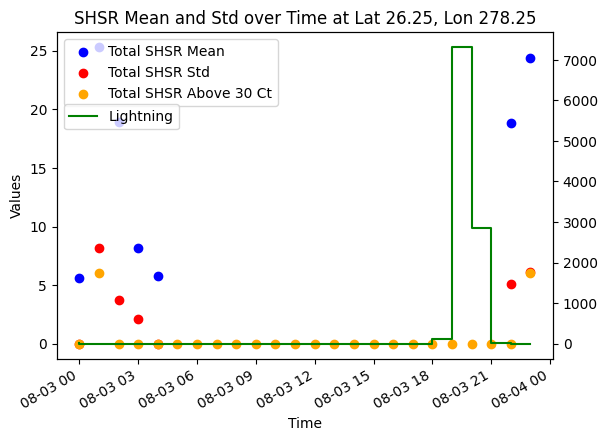

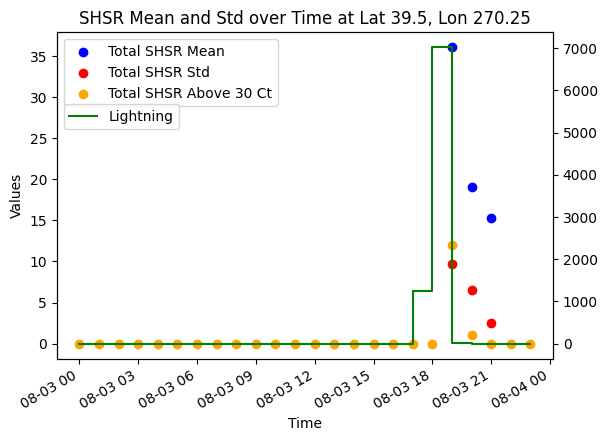

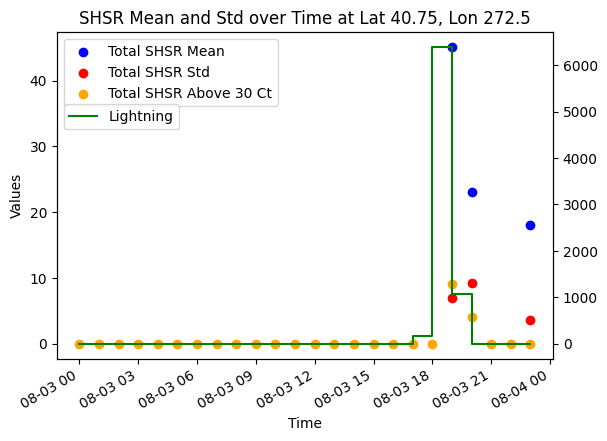

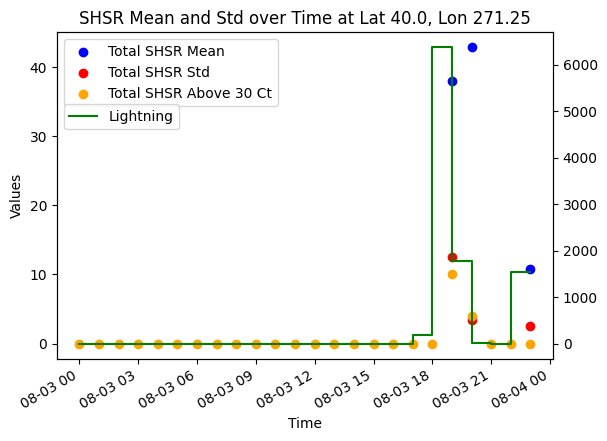

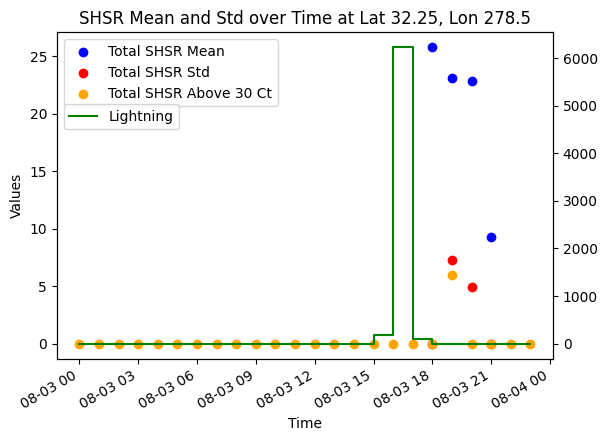

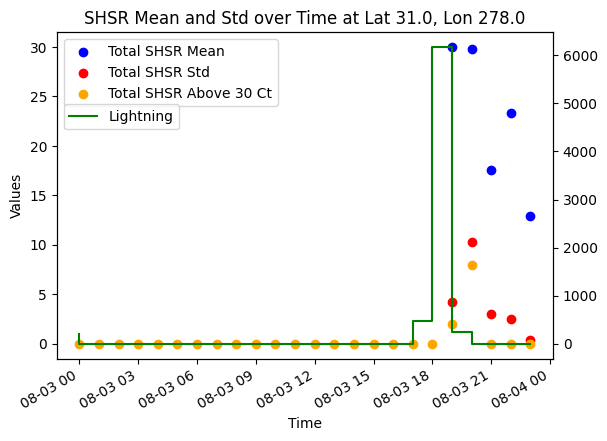

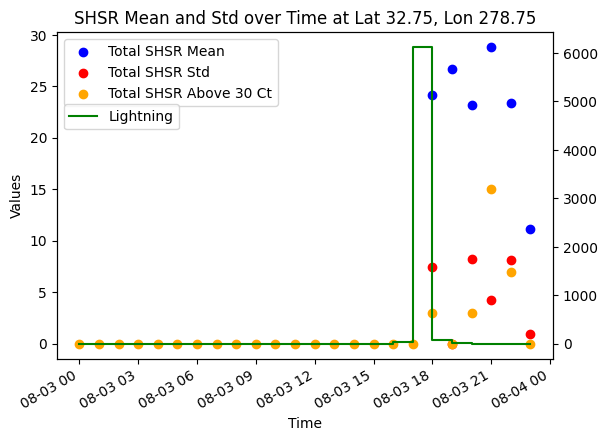

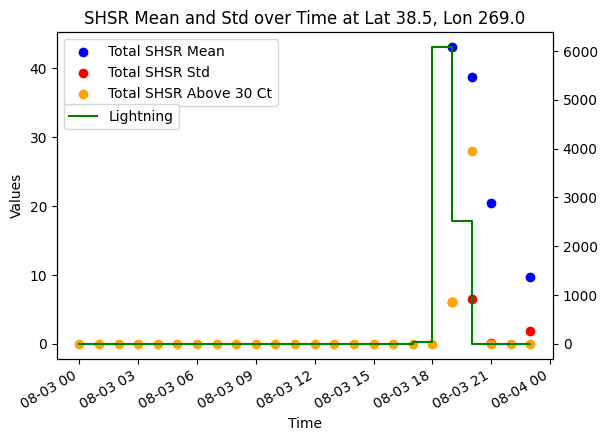

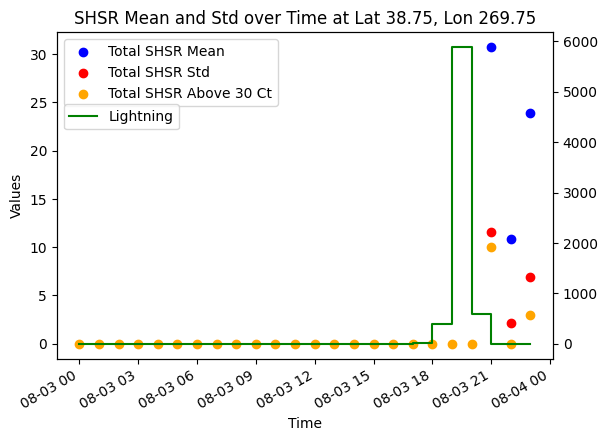

In [14]:
# plot SHSR and lightning for the top 10 lightning event's location in the max lightning date
for event in max_events:
    latitude, longitude = event
    latitude = latitude.item() if isinstance(latitude, np.ndarray) else latitude
    longitude = longitude.item() if isinstance(longitude, np.ndarray) else longitude
    plot_SHSR_and_lightning(latitude, longitude, ds_SHSR, ds_nldn) 
    

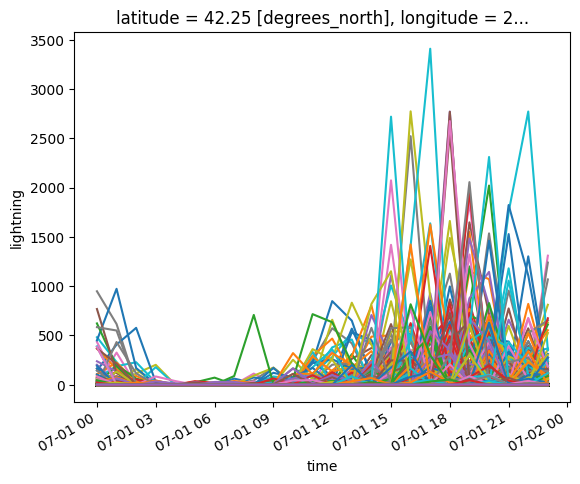

In [104]:
# Lets plot an annual time-series of lightning activity for the region with maximum lightning activity
ds_top_1_per_lightning = nldn_ds.sel(
    latitude=slice(lat_region[-1], lat_region[0]),
    longitude=slice(lon_region[0], lon_region[-1]),
).compute()

lat_lon = [(x, y) for x in lat for y in lon]
for x, y in lat_lon:
    ds_top_1_per_lightning.sel(
        latitude=x, longitude=y, time=slice("2022-07-01", "2022-07-01")
    ).lightning.plot()